# 04COVID 19 South Korea 

# Libraries

In [5]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import display

# Functions

# Colors

In [6]:
ord_color = "bisque"
spec_lev1 = "crimson"
spec_lev2 = 'orangered'
spec_lev3 = "lightcoral"

# Display Features

In [7]:
pd.set_option("max_rows", None) 

# Did Gender Affect who Got COVID and who Died from COVID?

## Load Data

In [8]:
gender = pd.read_csv(
    "C:\py\Projects\TuringCollege\COVID19\DataSets\gender.csv",
    index_col=False,
    skipinitialspace=True,
)

## Size

In [9]:
gender.shape

(242, 5)

# Data Types

In [10]:
gender.dtypes

date         object
time          int64
sex          object
confirmed     int64
deceased      int64
dtype: object

## Missing Data

In [11]:
gender.isna().sum()

date         0
time         0
sex          0
confirmed    0
deceased     0
dtype: int64

## Delete Unneeded Columns

In [12]:
gender = gender.drop(["time"], axis=1)

## Rename Columns

In [13]:
gender.rename(
    columns={
        "date": "Date",
        "sex": "Gender",
        "confirmed": "Confirmed",
        "deceased": "Deceased",
    },
    inplace=True,
)

## Rename Column Values

In [14]:
gender.replace('male', 'Male', inplace = True)
gender.replace('female', 'Female', inplace = True)

## First 5 Rows

In [15]:
gender.head()

,Date,Gender,Confirmed,Deceased
0,3/2/2020,Male,1591,13
1,3/2/2020,Female,2621,9
2,3/3/2020,Male,1810,16
3,3/3/2020,Female,3002,12
4,3/4/2020,Male,1996,20


## The Gender Factor 

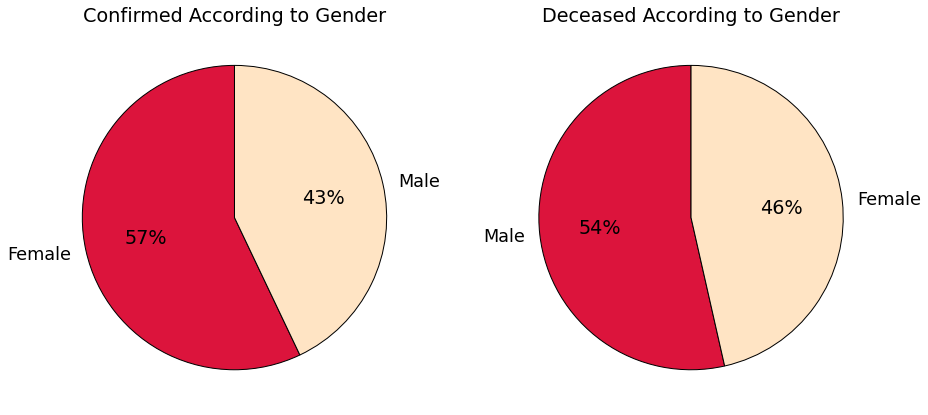

In [16]:
sns.set_context("paper", font_scale=2.0)

confirmed = gender[['Gender', 'Confirmed']].groupby(['Gender']).max().sort_values('Confirmed', ascending=False)
confirmed = confirmed.reset_index()

deceased = gender[['Gender', 'Deceased']].groupby(['Gender']).max().sort_values('Deceased', ascending=True)
deceased = deceased.reset_index()

data_confirmed = [confirmed.loc[0, "Confirmed"], confirmed.loc[1, "Confirmed"]]
labels_confirmed = ["Female", "Male"]
colors_confirmed = [spec_lev1, ord_color]

data_deceased = [deceased.loc[1, "Deceased"], deceased.loc[0, "Deceased"]]
labels_deceased = ["Male", "Female"]
colors_deceased = [spec_lev1, ord_color]


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

ax1.set_title("Confirmed According to Gender")
ax1.pie(
    data_confirmed,
    labels=labels_confirmed,
    colors=colors_confirmed,
    autopct="%0.0f%%",
    startangle=90,
    wedgeprops={"edgecolor": "black", "linewidth": 1},
)


ax2.set_title("Deceased According to Gender")
ax2.pie(
    data_deceased,
    labels=labels_deceased,
    colors=colors_deceased,
    autopct="%0.0f%%",
    startangle=90,
    wedgeprops={"edgecolor": "black", "linewidth": 1},
)

plt.show();

# Did Age Affect who Got COVID and Who Died from it? 

## Load Data

In [17]:
age = pd.read_csv("C:\py\Projects\TuringCollege\COVID19\DataSets\\age.csv", parse_dates=["date"])

## Size

In [18]:
age.shape

(1089, 5)

# Data Types

In [19]:
age.dtypes

date         datetime64[ns]
time                  int64
age                  object
confirmed             int64
deceased              int64
dtype: object

## Missing Data

In [20]:
age.isna().sum()

date         0
time         0
age          0
confirmed    0
deceased     0
dtype: int64

## Rename Columns

In [21]:
age.rename(
    columns={
        "date": "Date",
        "age": "Age",
        "confirmed": "Confirmed",
        "deceased": "Deceased",
    },
    inplace=True,
)

## Delete Unneeded Columns 

In [22]:
age.drop('time', inplace = True, axis = 1)

## The First Five Rows

In [23]:
age.head()

,Date,Age,Confirmed,Deceased
0,2020-03-02,0s,32,0
1,2020-03-02,10s,169,0
2,2020-03-02,20s,1235,0
3,2020-03-02,30s,506,1
4,2020-03-02,40s,633,1


## The Age Factor

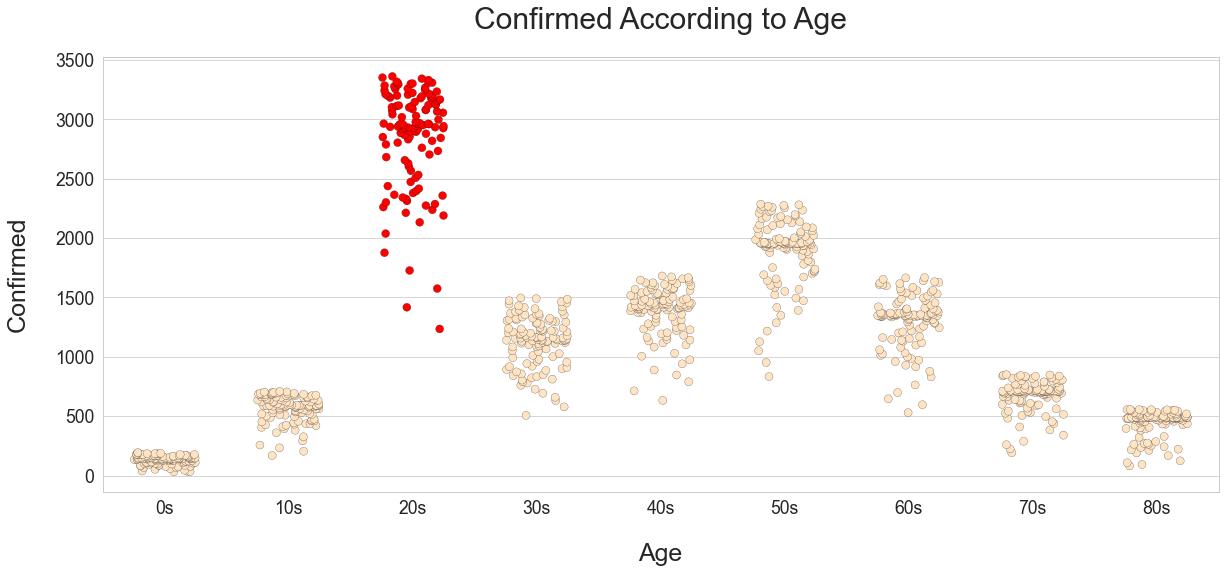

In [37]:
confirmed_by_age = (
    age[["Age", "Confirmed"]]
    .groupby(["Age"])
    .max()
    .sort_values("Confirmed", ascending=False)
)

confirmed_by_age = confirmed_by_age.reset_index()

plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=2.0)

ord_color = "bisque"
spec_lev1 = "red"
spec_lev2 = 'orangered'
spec_lev3 = "lightcoral"

palette = {
    "0s": ord_color,
    "10s": ord_color,
    "20s": spec_lev1,
    "30s": ord_color,
    "40s": ord_color,
    "50s": ord_color,
    "60s": ord_color,
    "70s": ord_color,
    "80s": ord_color, 
}

sns.stripplot(
    data=age,
    x="Age",
    y="Confirmed",
    jitter=0.25,
    size=8,
    linewidth=0.2,
    edgecolor="black",
    palette= palette,
)

plt.xlabel("Age", fontsize=25,  labelpad=25)
plt.ylabel("Confirmed", fontsize=25, labelpad=25)
plt.title("Confirmed According to Age", fontsize=30, y=1.05)

plt.show();

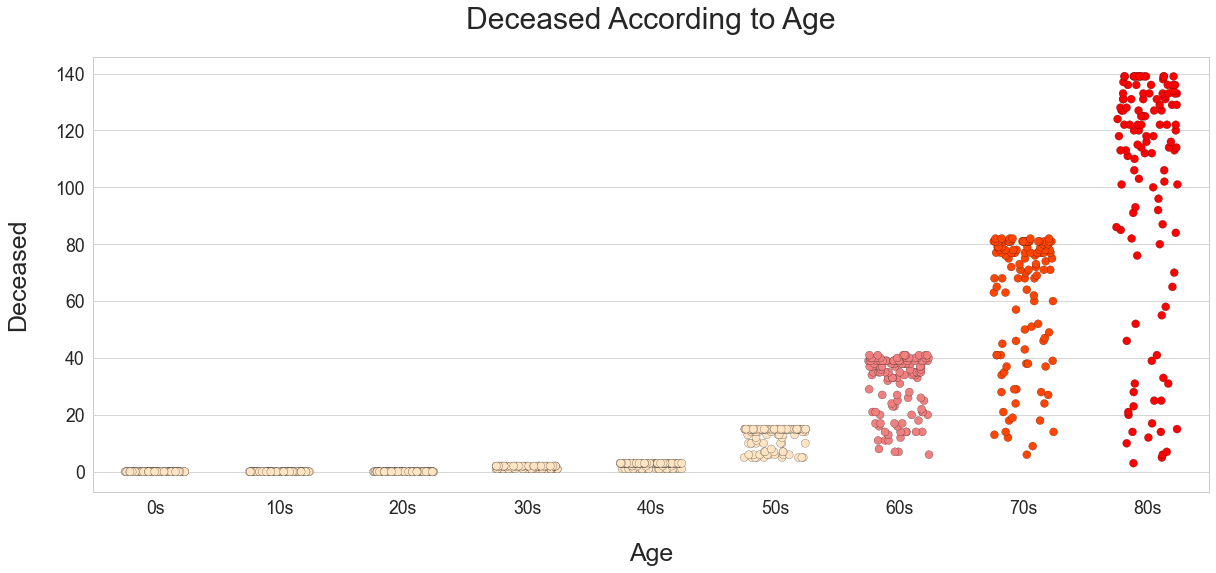

In [55]:
deceased_by_age = (
    age[["Age", "Deceased"]]
    .groupby(["Age"])
    .max()
    .sort_values("Deceased", ascending=False)
)

deceased_by_age = deceased_by_age.reset_index()

plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=2.0)

ord_color = "bisque"
spec_lev1 = "red"
spec_lev2 = 'orangered'
spec_lev3 = "lightcoral"

palette = {
    "0s": ord_color,
    "10s": ord_color,
    "20s": ord_color,
    "30s": ord_color,
    "40s": ord_color,
    "50s": ord_color,
    "60s": spec_lev3,
    "70s": spec_lev2,
    "80s": spec_lev1, 
}

sns.stripplot(
    data=age,
    x="Age",
    y="Deceased",
    jitter=0.25,
    size=8,
    linewidth=0.2,
    edgecolor='Black',
    palette= palette,

);

plt.xlabel("Age", fontsize=25, labelpad=25)
plt.ylabel("Deceased", fontsize=25, labelpad=25)
plt.title("Deceased According to Age", fontsize= 30, y=1.05)

plt.show();

# Why Did One Province Have the Majority of COVID19 Infections?

## Load Data

In [26]:
province = pd.read_csv(
    "C:\py\Projects\TuringCollege\COVID19\DataSets\province.csv",
    index_col=False,
    skipinitialspace=True,
)

## Size

In [27]:
province.shape

(2771, 6)

## Data Types

In [28]:
province.dtypes

date         object
time          int64
province     object
confirmed     int64
released      int64
deceased      int64
dtype: object

## Modify the Date Column

In [29]:
province["date"] = province["date"].astype("datetime64[ns]")

## Missing Data

In [30]:
province.isna().sum()

date         0
time         0
province     0
confirmed    0
released     0
deceased     0
dtype: int64

## Delete Unneeded Columns

In [31]:
province = province.drop(["time", "released"], axis=1)

## Rename Columns

In [32]:
province.rename(
    columns={
       "date": "Date",
        "province": "Province",
        "confirmed": "Confirmed",
        "deceased": "Deceased"
    },
    inplace=True,
)

## The First Five Rows

In [33]:
province.head()

,Date,Province,Confirmed,Deceased
0,2020-01-20,Seoul,0,0
1,2020-01-20,Busan,0,0
2,2020-01-20,Daegu,0,0
3,2020-01-20,Incheon,1,0
4,2020-01-20,Gwangju,0,0


## The Daegu Province Factor

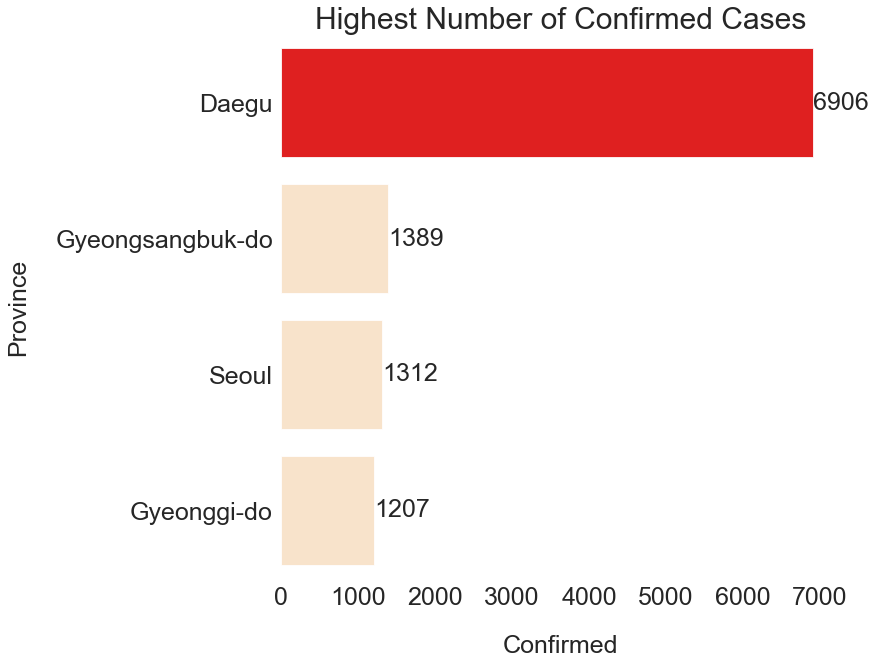

In [54]:
groupby_province = (
    province[["Province", "Confirmed"]]
    .groupby(["Province"])
    .max()
    .sort_values("Confirmed", ascending=False)
)

groupby_province = groupby_province.reset_index()
groupby_province.query('Confirmed>1000', inplace=True)

plt.figure(figsize=(10, 10))
sns.set(style="white")
sns.set_context("paper", font_scale=2.0)

plt.title("Highest Number of Confirmed Cases", fontsize=30, y=1);

palette = {
    "Daegu": spec_lev1,
    "Gyeongsangbuk-do": ord_color,
    "Seoul": ord_color,
    "Gyeonggi-do": ord_color,
}

chart = sns.barplot(
    x="Confirmed",
    y="Province",
    ci=None,
    dodge=False,
    data=groupby_province,
    order=groupby_province.sort_values("Confirmed", ascending=False).Province,
    palette=palette
)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("Confirmed", fontsize=25, labelpad=25)
plt.ylabel("Province", fontsize=25, labelpad=25)

sns.despine(left=True, bottom=True)
chart.bar_label(chart.containers[0], size=25)

plt.show();

# What about Nursing Homes and Academic Institutions?

# Load Data

In [38]:
population = pd.read_csv(
    "C:\py\Projects\TuringCollege\COVID19\DataSets\population.csv",
    index_col=False,
    skipinitialspace=True,
)

# Size

In [39]:
population.shape

(243, 12)

# Data Types

In [40]:
population.dtypes

code                          int64
province                     object
city                         object
latitude                    float64
longitude                   float64
elementary_school_count       int64
kindergarten_count            int64
university_count              int64
academy_ratio               float64
elderly_population_ratio    float64
elderly_alone_ratio         float64
nursing_home_count            int64
dtype: object

# Missing Data

In [41]:
population.isna().sum()

code                        0
province                    0
city                        0
latitude                    0
longitude                   0
elementary_school_count     0
kindergarten_count          0
university_count            0
academy_ratio               0
elderly_population_ratio    0
elderly_alone_ratio         0
nursing_home_count          0
dtype: int64

In [42]:
population.isna().sum()

code                        0
province                    0
city                        0
latitude                    0
longitude                   0
elementary_school_count     0
kindergarten_count          0
university_count            0
academy_ratio               0
elderly_population_ratio    0
elderly_alone_ratio         0
nursing_home_count          0
dtype: int64

# Delete Unneeded Columns

In [43]:
population = population.drop(
    [
        "code",
        "city",
        "latitude",
        "longitude",
        "academy_ratio",
        "elderly_population_ratio",
        "elderly_alone_ratio",
    ],
    axis=1,
)

# Rename Columns

In [44]:
population.rename(
    columns={
        "province": "Province",
        "elementary_school_count": "Elem Schools",
        "kindergarten_count": "Kindergartens",
        "university_count": "Universities",
        "nursing_home_count": "Nursing Homes"
        
    },
    inplace=True,
)

# Reorder Columns

In [45]:
population = population[
    [
        "Province",
        "Kindergartens",
        "Elem Schools",
        "Universities",
        "Nursing Homes",
    ]
]

# The First Five Rows

In [46]:
population.head()

,Province,Kindergartens,Elem Schools,Universities,Nursing Homes
0,Seoul,830,607,48,22739
1,Seoul,38,33,0,3088
2,Seoul,32,27,0,1023
3,Seoul,21,14,0,628
4,Seoul,56,36,1,1080


# Nursing Homes

In [47]:
# nursing_homes = population.groupby(['Province'])['Nursing Homes'].sum().sort_values(ascending = False)

In [48]:
pd.set_option("display.max.columns", None)
pivot_nursing_homes = pd.pivot_table(
    data=population,
    index="Province",
    values=["Nursing Homes"],
    aggfunc="sum",
)

pivot_nursing_homes = pivot_nursing_homes.loc[pivot_nursing_homes['Nursing Homes'] > 10000].sort_values('Nursing Homes',ascending = False)
pivot_nursing_homes.reset_index(inplace=True)

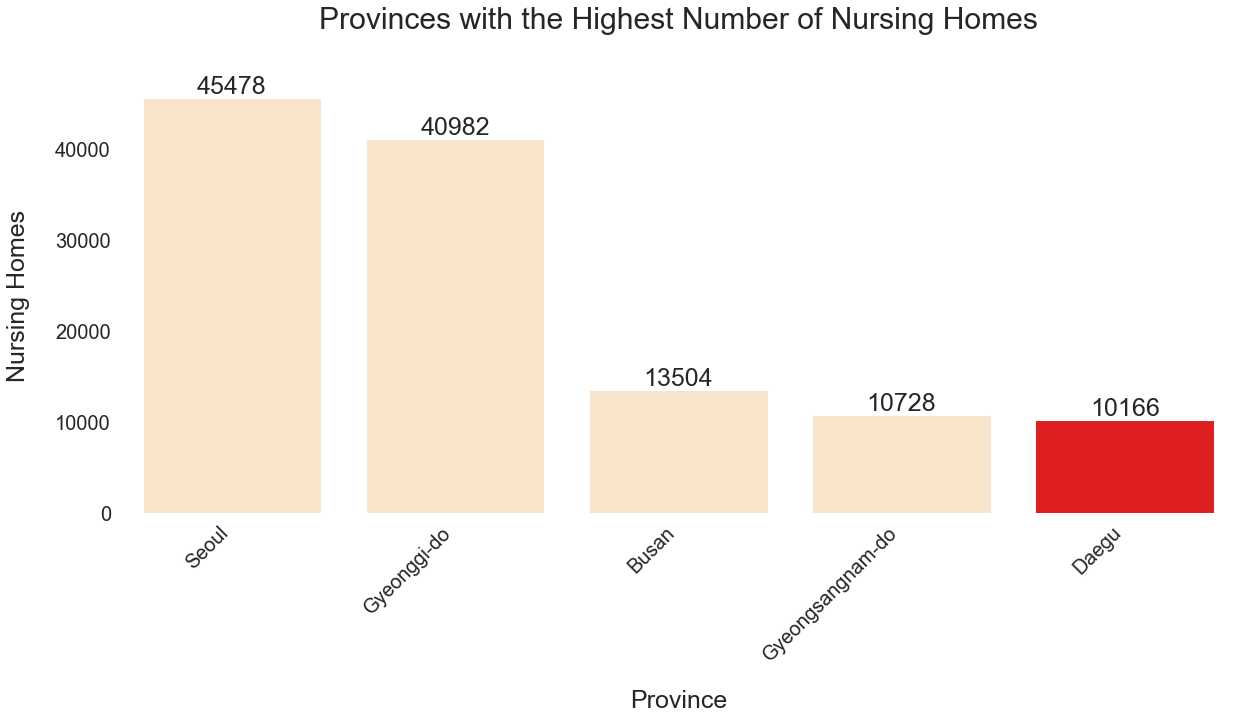

In [53]:
sns.set(style="white")

palette = {
    "Seoul": ord_color,
    "Gyeonggi-do": ord_color,
    "Busan": ord_color,
    "Gyeongsangnam-do": ord_color,
    "Daegu": spec_color,
}


plt.figure(figsize=(20, 8))
chart = sns.barplot(
    x="Province",
    y="Nursing Homes",
    data=pivot_nursing_homes,
    ci=None,
    order=pivot_nursing_homes.sort_values("Nursing Homes", ascending=False).Province,
    palette=palette,
)

sns.despine(left=True, bottom=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Province", fontsize=25, labelpad=25)
plt.ylabel("Nursing Homes", fontsize=25, labelpad=25)

chart.bar_label(chart.containers[0], size=25)
plt.title("Provinces with the Highest Number of Nursing Homes", fontsize=30, y=1.1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right")

plt.show();

# Academic Institutions

In [24]:
academic = population.groupby(['Province'])[['Kindergartens', 'Elem Schools', 'Universities']].agg(sum)
academic = academic.reset_index()
academic
academic ['Total'] = academic.sum(axis=1)
academic = academic.sort_values('Total',ascending = False)
academic = academic.loc[academic['Total'] > 1000].sort_values('Total',ascending = False)

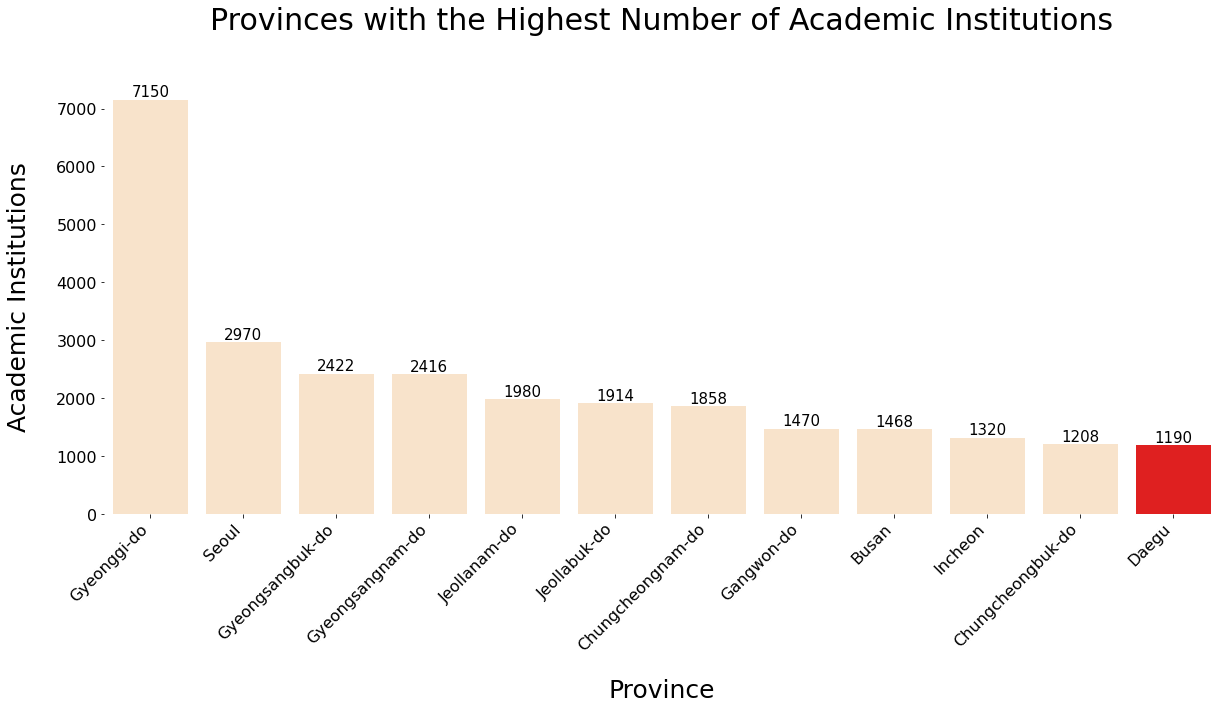

In [25]:
ord_color = "bisque"
spec_color = "red"

palette = {
    "Seoul": ord_color,
    "Gyeonggi-do": ord_color,
    "Busan": ord_color,
    "Gyeongsangbuk-do": ord_color,
    "Gyeongsangnam-do": ord_color,
    "Jeollanam-do": ord_color,
    "Jeollabuk-do": ord_color,
    "Chungcheongnam-do": ord_color,
    "Gangwon-do": ord_color,
    "Incheon": ord_color,
    "Chungcheongbuk-do": ord_color,
    "Daegu": spec_color,
}


plt.figure(figsize=(20, 8))
chart = sns.barplot(
    x="Province",
    y="Total",
    data=academic,
    ci=None,
    order=academic.sort_values("Total", ascending=False).Province,
    palette=palette,
)

sns.despine(left=True, bottom=True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Province", fontsize=25, labelpad=25)
plt.ylabel("Academic Institutions", fontsize=25, labelpad=25)

chart.bar_label(chart.containers[0], size=15)
plt.title("Provinces with the Highest Number of Academic Institutions", fontsize=30, y=1.1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right");

# Why Did One Group Have the Majority of COVID19 Infections?

## Load Data

In [149]:
case = pd.read_csv(
    "C:\py\Projects\TuringCollege\COVID19\DataSets\\case.csv",
    index_col=False,
    skipinitialspace=True,
)

## Size

In [150]:
case.shape

(174, 8)

# Data Types

In [151]:
case.dtypes

case_id            int64
province          object
city              object
group               bool
infection_case    object
confirmed          int64
latitude          object
longitude         object
dtype: object

## Missing Data

In [107]:
case.isna().sum()

case_id           0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

## Delete Unneeded Columns

In [108]:
case = case.drop(["case_id", "city", "group", "latitude", "longitude"], axis=1)

## Delete Unneeded Row

In [109]:
case = case[case.infection_case != 'etc']

## Rename Columns

In [110]:
case.rename(
    columns={
        "province": "Province",
        "infection_case": "Infection Reason",
        "confirmed": "Confirmed",
    },
    inplace=True,
)

## Rename Column Values

In [111]:
case.replace('contact with patient', 'Contact with Patient', inplace=True)
case.replace('overseas inflow', 'Overseas Inflow', inplace=True)
case.replace('gym facility in Cheonan', 'Gym Facility in Cheonan', inplace=True)
case.replace('Door-to-door sales in Daejeon', 'Door-to-Door Sales in Daejeon', inplace=True)
case.replace('gym facility in Cheonan', 'Gym Facility in Cheonan', inplace=True)
case.replace('Geumcheon-gu rice milling machine manufacture', 'Geumcheon-gu Rice Milling Machine Manufacture', inplace=True)
case.replace('Lotte Confectionery logistics center', 'Lotte Confectionery Logistics Center', inplace=True)
case.replace('gym facility in Sejong', 'Gym Facility in Sejong', inplace=True)
case.replace('Seoul City Hall Station safety worker', 'Seoul City Hall Station Safety Worker', inplace=True)
case.replace('Gangnam Yeoksam-dong gathering', 'Gangnam Yeoksam-dong Gathering', inplace=True)
case.replace('Seongnam neighbors gathering', 'Seongnam neighbors Gathering', inplace=True)
case.replace('Eunpyeong-Boksagol culture center', 'Eunpyeong-Boksagol Culture Center', inplace=True)
case.replace('Biblical Language study meeting', 'Biblical Language Study Meeting', inplace=True)
case.replace('Daejeon door-to-door sales', 'Daejeon Door-to-Door Sales', inplace=True)

## First Five Rows

In [112]:
case.head()

,Province,Infection Reason,Confirmed
0,Seoul,Itaewon Clubs,139
1,Seoul,Richway,119
2,Seoul,Guro-gu Call Center,95
3,Seoul,Yangcheon Table Tennis Club,43
4,Seoul,Day Care Center,43


## The Shincheonji Church Factor

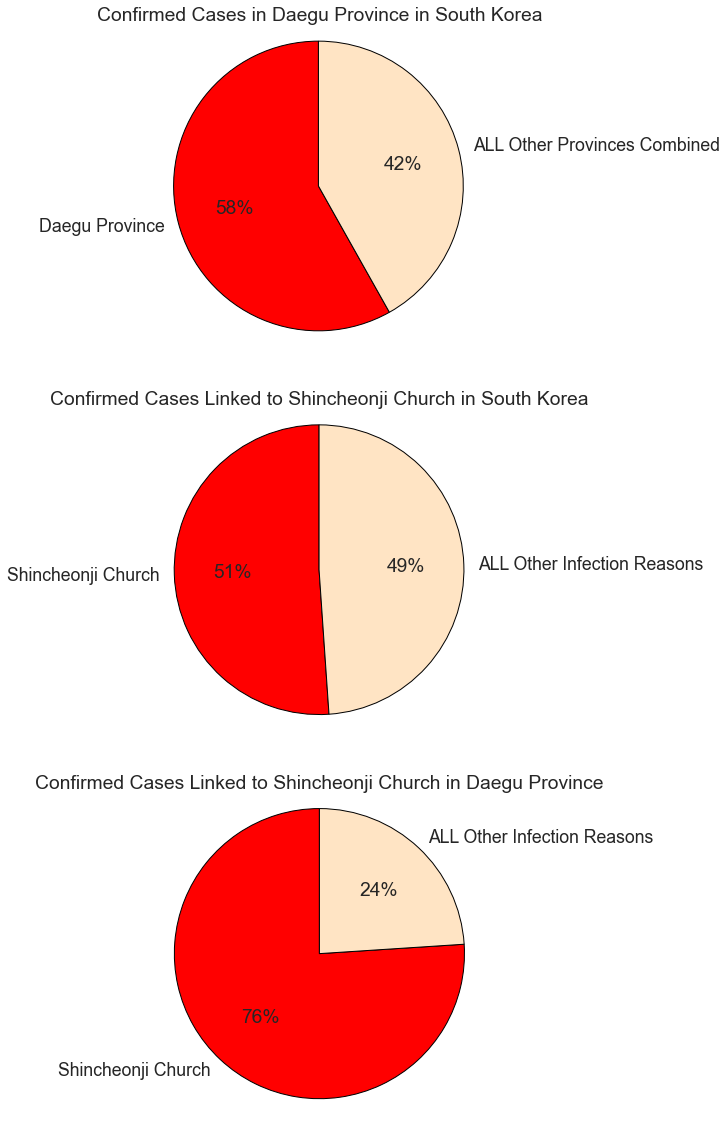

In [139]:
sns.set_context("paper", font_scale=2.0)

pivot_infection = pd.pivot_table(
    data=case, 
    index=["Infection Reason"], 
    values="Confirmed", 
    aggfunc="sum"
).sort_values("Confirmed", ascending=False)

total = pivot_infection["Confirmed"].sum()


pivot_province = pd.pivot_table(
    data=case, 
    index=["Province"], 
    values="Confirmed", 
    aggfunc="sum"
).sort_values("Confirmed", ascending=False)

daegu = pivot_province.loc["Daegu"]
daegu = daegu["Confirmed"]

other_provinces = total - daegu


shincheonji_church_daegu = case.loc[
    (case["Province"] == "Daegu") & (case["Infection Reason"] == "Shincheonji Church")
]
shincheonji_church_daegu = shincheonji_church_daegu.set_index("Infection Reason")
shincheonji_church_daegu = shincheonji_church_daegu.loc["Shincheonji Church"]
shincheonji_church_daegu = shincheonji_church_daegu["Confirmed"]

other_daegu = daegu - shincheonji_church_daegu


shincheonji_church = pivot_infection.loc["Shincheonji Church"]
shincheonji_church = shincheonji_church["Confirmed"]

other_overall = total - shincheonji_church


data_shincheonji_church_SK = [shincheonji_church, other_overall]
labels_shincheonji_church_SK = ['Shincheonji Church', 'ALL Other Infection Reasons']
colors_shincheonji_church_SK = [spec_lev1, ord_color]

data_shincheonji_church_daegu = [shincheonji_church_daegu, other_daegu]
labels_shincheonji_church_daegu = ['Shincheonji Church', 'ALL Other Infection Reasons']
colors_shincheonji_church_daegu = [spec_lev1, ord_color]

data_daegu = [daegu, other_provinces]
labels_daegu = ['Daegu Province', 'ALL Other Provinces Combined']
colors_daegu = [spec_lev1, ord_color]

fig, (ax3, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(7,20))

ax1.set_title("Confirmed Cases Linked to Shincheonji Church in South Korea")
ax2.set_title("Confirmed Cases Linked to Shincheonji Church in Daegu Province")
ax3.set_title("Confirmed Cases in Daegu Province in South Korea")

ax1.pie(
    data_shincheonji_church_SK,
    labels=labels_shincheonji_church_SK,
    colors=colors_shincheonji_church_SK,
    startangle=90,
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black", "linewidth": 1},
);

ax2.pie(
    data_shincheonji_church_daegu,
    labels=labels_shincheonji_church_daegu,
    colors=colors_shincheonji_church_daegu,
    startangle=90,
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black", "linewidth": 1},
);

ax3.pie(
    data_daegu,
    labels=labels_daegu,
    colors=colors_daegu,
    startangle=90,
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black", "linewidth": 1},
);

ax1.axis('equal') 
ax2.axis('equal') 
ax3.axis('equal') 

plt.show();